In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
balance_data=pd.read_csv('pyn for DS/data3.csv')
balance_data.columns=['class_name', 'Left_weight', 'Left_distance', 'right_weight', 'right_distance']
balance_data

,class_name,Left_weight,Left_distance,right_weight,right_distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


# Decision tree classifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X3=balance_data.iloc[:, 1:5]
Y3=balance_data.iloc[:, 0:1]
print(X3)
Y3

     Left_weight  Left_distance  right_weight  right_distance
0              1              1             1               2
1              1              1             1               3
2              1              1             1               4
3              1              1             1               5
4              1              1             2               1
..           ...            ...           ...             ...
619            5              5             5               1
620            5              5             5               2
621            5              5             5               3
622            5              5             5               4
623            5              5             5               5

[624 rows x 4 columns]


,class_name
0,R
1,R
2,R
3,R
4,R
...,...
619,L
620,L
621,L
622,L


In [5]:
X3_train, X3_test, Y3_train, Y3_test=train_test_split(X3, Y3, test_size=0.2, random_state=0)
# Gini Impurity
lm_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                              max_depth=3, 
                              min_samples_leaf=5) # min. samples req. at leaf node
lm_gini.fit(X3_train, Y3_train)
y_pred = lm_gini.predict(X3_test)
# Information Gain
lm_ig = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                              max_depth=3, 
                              min_samples_leaf=5)
lm_ig.fit(X3_train, Y3_train)
y_pred_ig = lm_ig.predict(X3_test)

lm_gini


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [62]:
print(y_pred)
print(y_pred_ig)

['L' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L'
 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'L'
 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R']
['L' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'L'
 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'L'
 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' '

In [64]:
print("Accuracy of Gini Impurity model: ", 
      accuracy_score(Y3_test, y_pred) * 100)
print("Accuracy of Information Gain model: ", 
      accuracy_score(Y3_test, y_pred_ig) * 100)

Accuracy of Gini Impurity model:  73.6
Accuracy of Information Gain model:  72.0


# K-Means Clustering

In [21]:
iris_modefy=pd.read_csv('pyn for ds/iris-modified.csv')
iris_modefy

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Finding the number of clusters')

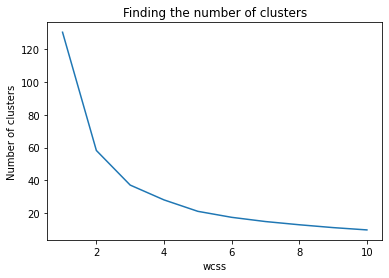

In [22]:
X=iris_modefy[['Sepal.Length', 'Sepal.Width']]
wcss=[]
for i in range(1,11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('wcss')
plt.ylabel('Number of clusters')
plt.title('Finding the number of clusters')


In [23]:
model4 = KMeans(n_clusters=3)
model4.fit(iris_modefy[['Sepal.Length', 'Sepal.Width']])

KMeans(n_clusters=3)

In [24]:
print(np.unique(model4.labels_))

[0 1 2]


In [25]:
cluster1=iris_modefy[model4.labels_==0]
print('The size of cluster1:' ,cluster1.size)
cluster2=iris_modefy[model4.labels_==1]
print('The size of cluster 2:' ,cluster2.size)
cluster3=iris_modefy[model4.labels_==2]
print('The size of cluster 3:', cluster3.size)
y=cluster1

The size of cluster1: 200
The size of cluster 2: 188
The size of cluster 3: 212


In [26]:
x = iris_modefy.iloc[:, [1,2]].values
from sklearn.cluster import KMeans
y_kmeans = model4.fit_predict(x)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster_1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster_2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster_3')
#Plotting the centroids of the clusters
plt.scatter(model4.cluster_centers_[:, 0], model4.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
